In [6]:
%pylab inline
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import tracpy.tools
import tracpy
import glob
import cartopy.crs as ccrs
import cmocean as cmo
import cartopy
import tracpy.plotting
import octant
from matplotlib import cm, colors
from scipy.optimize import curve_fit
import xarray

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'grid', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://copano.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [3]:
d = nc.Dataset(loc)

In [8]:
start_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
    start_time.append( time )

start_time = np.array(start_time)

1993-07-01 00:00:00
1994-07-01 00:00:00
1995-07-01 00:00:00
1996-07-01 00:00:00
1997-07-01 00:00:00
1998-07-01 00:00:00
1999-07-01 00:00:00
2000-07-01 00:00:00
2001-07-01 00:00:00
2002-07-01 00:00:00
2003-07-01 00:00:00
2004-07-01 00:00:00
2005-07-01 00:00:00
2006-07-01 00:00:00
2007-07-01 00:00:00
2008-07-01 00:00:00
2009-07-01 00:00:00
2010-07-01 00:00:00
2011-07-01 00:00:00
2012-07-01 00:00:00
2013-07-01 00:00:00
2014-07-01 00:00:00
2015-07-01 00:00:00
2016-07-01 00:00:00


In [9]:
end_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 744 + 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+248]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+2*248]) )
    end_time.append( time )
#     end_time.append( time+248 )
#     end_time.append( time+2*248 )
    
end_time = np.array(end_time)

1993-08-01 00:00:00
1994-08-01 00:00:00
1995-08-01 00:00:00
1996-08-01 00:00:00
1997-08-01 00:00:00
1998-08-01 00:00:00
1999-08-01 00:00:00
2000-08-01 00:00:00
2001-08-01 00:00:00
2002-08-01 00:00:00
2003-08-01 00:00:00
2004-08-01 00:00:00
2005-08-01 00:00:00
2006-08-01 00:00:00
2007-08-01 00:00:00
2008-08-01 00:00:00
2009-08-01 00:00:00
2010-08-01 00:00:00
2011-08-01 00:00:00
2012-08-01 00:00:00
2013-08-01 00:00:00
2014-08-01 00:00:00
2015-08-01 00:00:00
2016-08-01 00:00:00


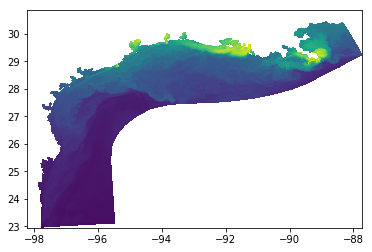

In [570]:
plt.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], d["dye_01"][ 2000, 29, :, :])

# ds = d["dye_01"][ start_time[0] : end_time[0] , 29, 27:35, 301:310]
# ds

# plt.bar( bins[:-1],  hist, width=0.12959)

In [39]:
d["dye_01"][ 2000, 29, :, :].shape

(191, 671)

# Mississippi

In [186]:
# bins = np.linspace(0,0.11,50)
# hist = np.zeros(len(bins)-1)

# index = 23
# hist += np.histogram( d["dye_02"][ start_time[index] : end_time[index], 29, 27:35, 301:310], bins)[0]

In [10]:
d = xarray.open_dataset(loc)

In [19]:
miss_bins = np.linspace(0,0.5,300)
miss_hist = np.zeros(len(miss_bins)-1)

# for yind in range(24):
yind = 22
print( yind )
miss_dye = d["dye_02"][ start_time[yind]-720 : end_time[yind]-720, :, 27:35, 301:310]
for time in range(744):
    miss_hist += np.histogram( miss_dye[time, :, :, :], miss_bins )[0]

22


In [20]:
np.savez( "miss_June2015", hist=miss_hist, bins=miss_bins )

In [30]:
miss_hist

array([6.08147e+05, 7.38740e+04, 4.74890e+04, 3.68110e+04, 2.49770e+04,
       1.90300e+04, 1.54570e+04, 1.34400e+04, 1.21060e+04, 1.06910e+04,
       9.81300e+03, 9.55600e+03, 9.20500e+03, 9.05400e+03, 8.93500e+03,
       8.54900e+03, 8.44500e+03, 8.21900e+03, 8.38700e+03, 8.24100e+03,
       7.93400e+03, 7.71200e+03, 7.94700e+03, 7.95700e+03, 8.05600e+03,
       8.01400e+03, 8.72100e+03, 9.05800e+03, 8.96400e+03, 9.33200e+03,
       9.89000e+03, 1.06980e+04, 1.12380e+04, 1.25850e+04, 1.54030e+04,
       1.82160e+04, 2.49460e+04, 2.67670e+04, 2.91070e+04, 2.85970e+04,
       2.93290e+04, 3.06460e+04, 3.84250e+04, 4.17880e+04, 3.99740e+04,
       3.02650e+04, 3.23910e+04, 2.24420e+04, 2.19420e+04, 2.07910e+04,
       1.68090e+04, 1.18840e+04, 1.12570e+04, 1.12820e+04, 1.18030e+04,
       9.33700e+03, 3.31700e+03, 1.33600e+03, 4.07000e+02, 4.70000e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

# Fit Gaussian

In [13]:
def func(x, a, b, c, d ):
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

In [23]:
width = 0.8
fig = plt.figure(figsize=(20,10),dpi=600)
fig.tight_layout()   

# all
ax = fig.add_subplot(111)
missall = np.load("miss_all.npz")

ax.bar( missall["bins"][0:-1], missall["hist"][0:], alpha=0.3, width=0.002, color="purple")
popt, pcov = curve_fit(func, missall["bins"][22:120], missall["hist"][22:120])
xdata = np.linspace(0, 0.1, 150 )
pltall = ax.plot( xdata, func( xdata, *popt), color="purple", linewidth=5 )

ax.set_ylim(0,470000)
ax.set_xlim(0,0.1)

ax.set_xticks( [0, 0.05, 0.1] )
ax.set_xticklabels( [0, 0.05, 0.1], fontsize=60 )
ax.set_xlabel( "Dye concentration", fontsize=60)

ax.set_yticks( [50000, 200000, 350000] )
ax.set_yticklabels( ['', '', ''], fontsize=24 )
# ax.set_ylabel( "Counts 1993-2016", fontsize=24)



# 2016
ax2 = ax.twinx()
miss15 = np.load("miss_June2015.npz")

ax2.bar( miss15["bins"][0:60], miss15["hist"][0:60], alpha=0.3, width=0.002, color="orange")

miss16 = np.load("miss_2016.npz")
ax2.bar( miss16["bins"][0:60], miss16["hist"][0:60], alpha=0.3, width=0.002, color="black")
# popt, pcov = curve_fit(func, miss16["bins"][30:60], miss16["hist"][30:60])
# xdata = np.linspace(0, 0.1, 150 )
# plt16 = ax2.plot( xdata, func( xdata, *popt), color="black", linewidth=5 )

ax2.set_ylim(0,50000)
# ax2.set_yticks( [5000, 22500, 40000] )
# ax2.set_yticklabels( ['', '', ''], fontsize=24 )
# ax2.set_ylabel( "Counts 2016", fontsize=24)

# fig.legend( [pltall[0], plt16[0]] , ["All years", "2016"], loc=(0.8,0.7), fontsize=30 )

# ax.set_title( "Mississippi River dye concentration over East Bank in July\n", fontsize=35 )
ax.text( 0.06, 410000, "Mississippi", fontsize=80)

fig.savefig( "figures/missdye.png" )

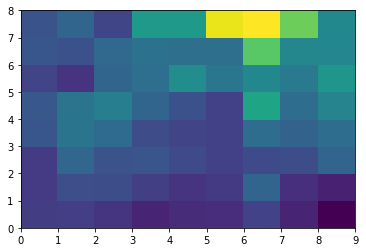

In [748]:
plt.pcolormesh( miss_dye[10,0,:,:] )

In [154]:
1994+23

2017

In [164]:
popt

array([3.45036155e+04, 7.05652457e-02, 1.07012526e-02, 1.14474884e+03])

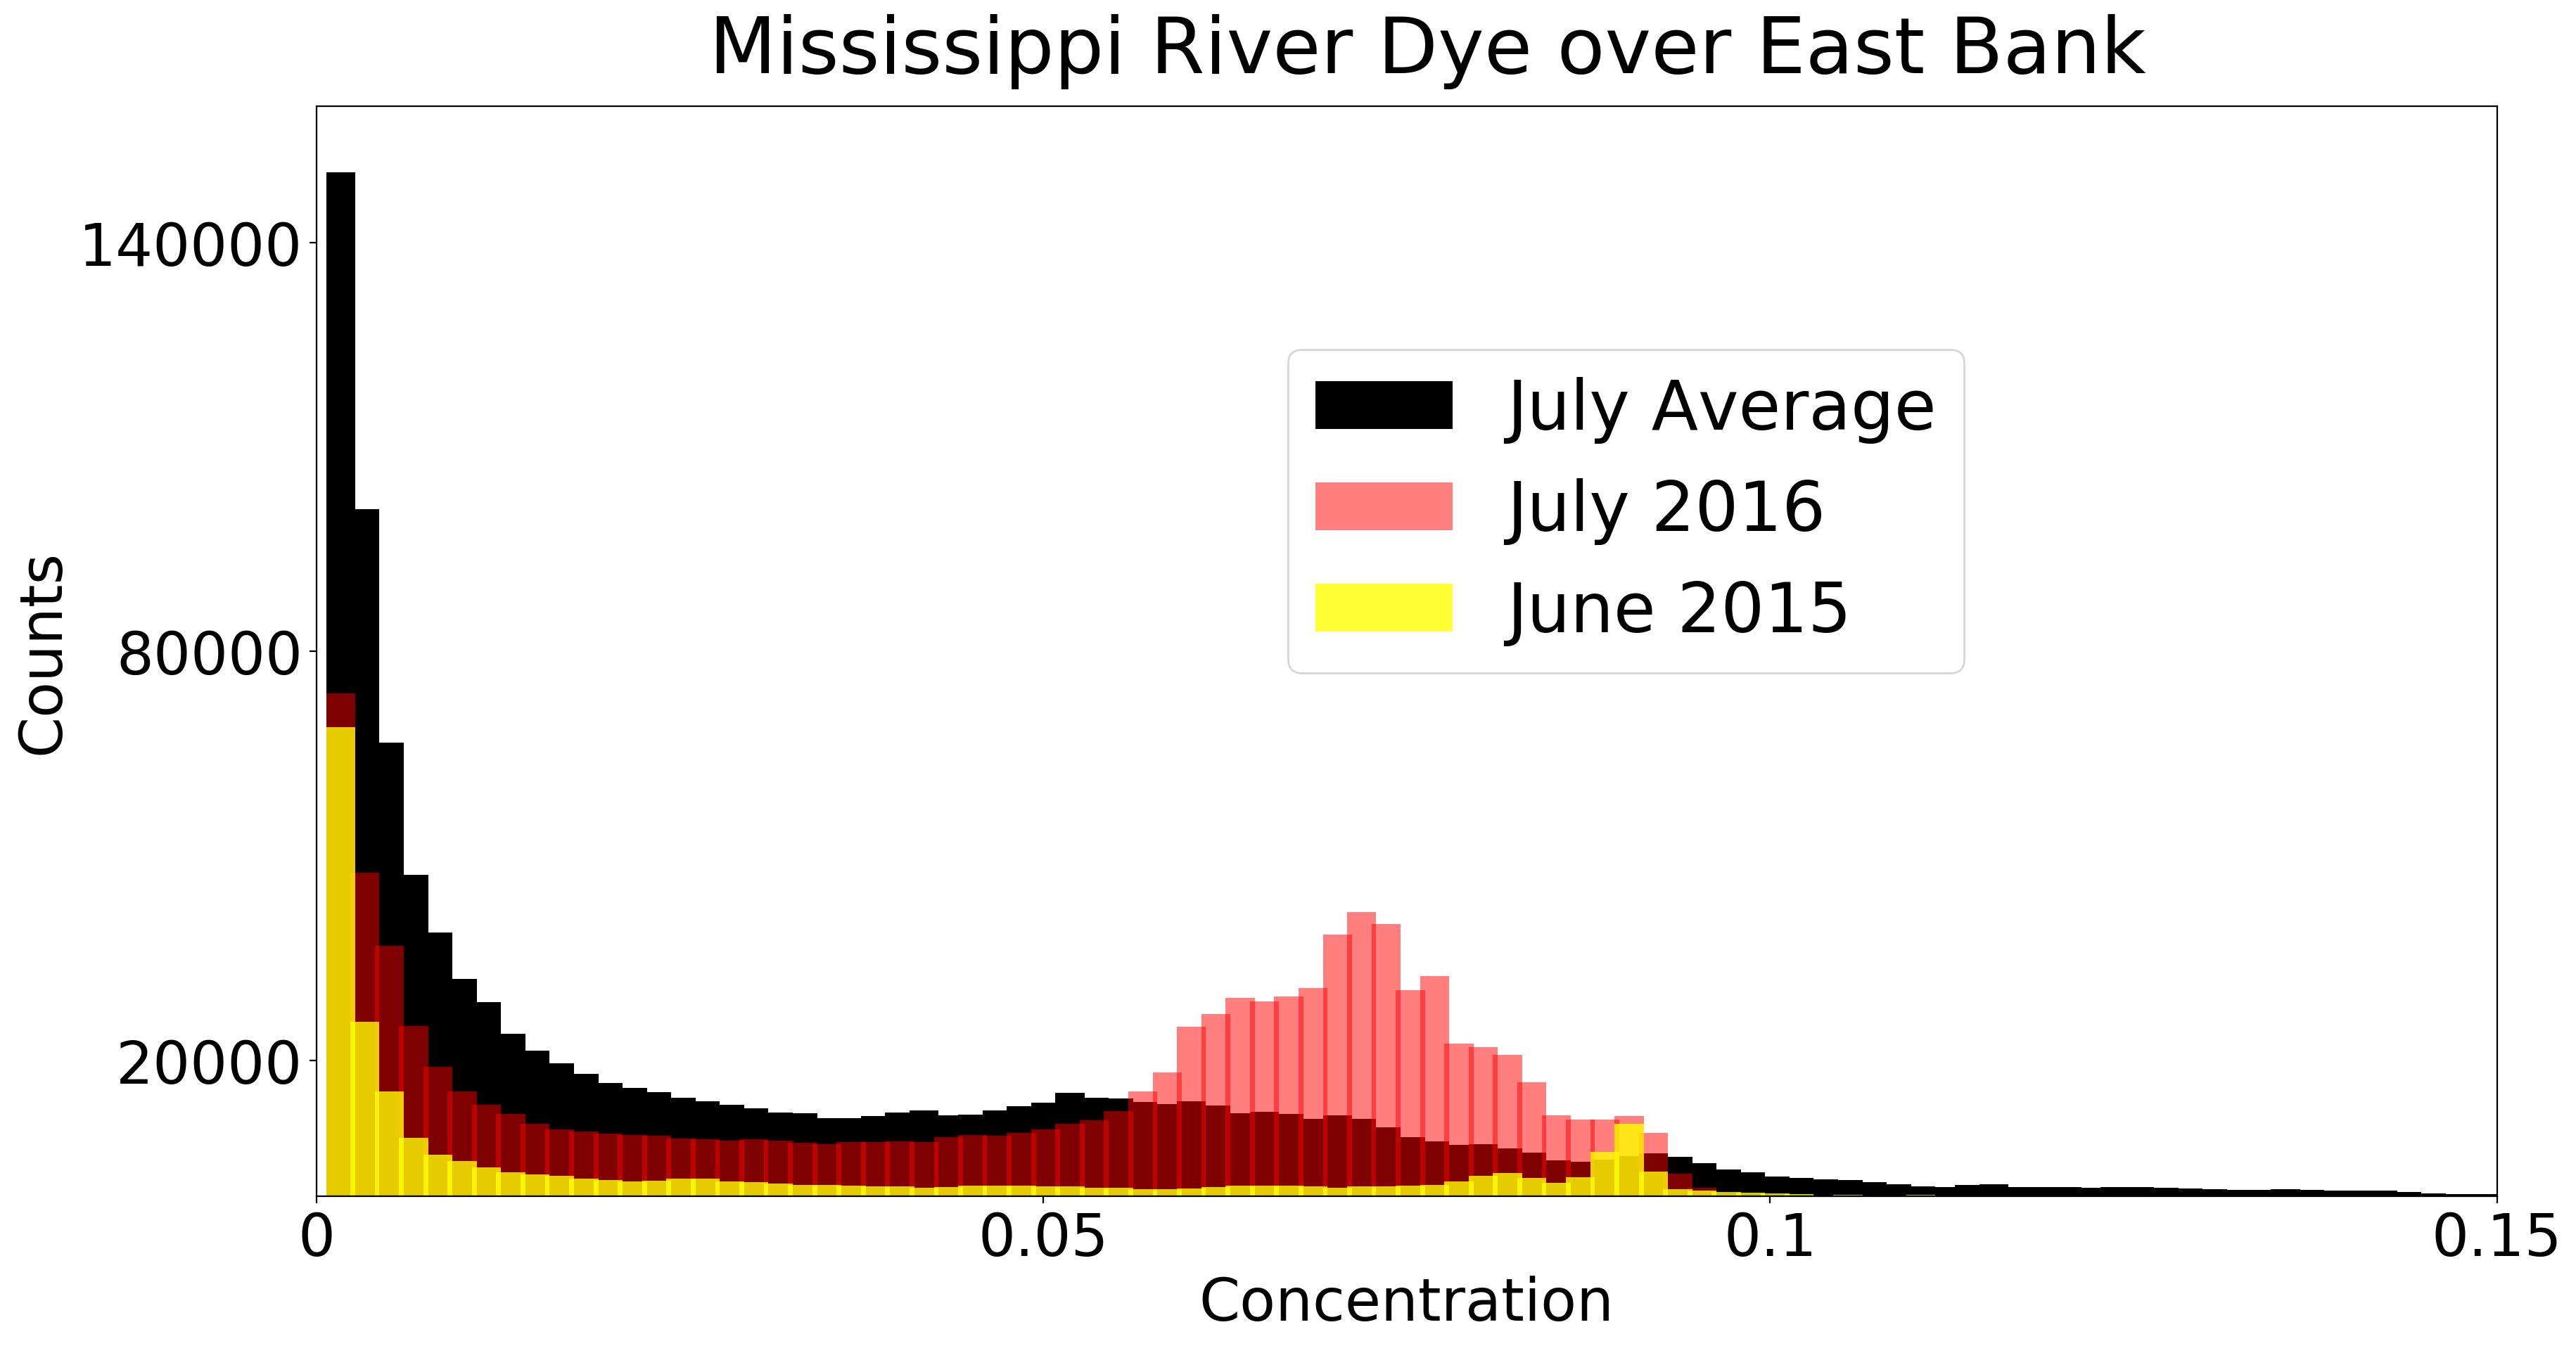

In [71]:
width = 0.8
fig = plt.figure(figsize=(20,10),dpi=200)
fig.tight_layout() 

ax = fig.add_subplot(111)
ax.set_xlim(0, 0.15)
ax.set_ylim(0, 160000)

missall = np.load("miss_all.npz")
_all = ax.bar( (missall["bins"][1:-1]), (missall["hist"][1:]/23.), alpha=1, width=0.002, color="black")

miss16 = np.load("miss_2016.npz")
_16 = ax.bar( (miss16["bins"][1:-1]), (miss16["hist"][1:]), alpha=0.5, width=0.002, color="red")

miss15 = np.load("miss_June2015.npz")
_15 = ax.bar( (miss15["bins"][1:-1]), (miss15["hist"][1:]), alpha=0.8, width=0.002, color="yellow")


fig.legend( [_all, _16, _15], ["July Average", "July 2016", "June 2015"], loc=(0.5, 0.5), fontsize=35)

ax.set_xticks( [0, 0.05, 0.1, 0.15] )
ax.set_xticklabels( [0, 0.05, 0.1, 0.15], fontsize=30 )

ax.set_yticks( [20000, 80000, 140000] )
ax.set_yticklabels( [20000, 80000, 140000], fontsize=30 )

fig.subplots_adjust(top=0.9)
ax.text( 0.027, 165000, "Mississippi River Dye over East Bank", fontsize=40 )
ax.set_xlabel( "Concentration", fontsize=30 )
ax.set_ylabel( "Counts", fontsize=30 )

fig.savefig("figures/misshist.png")